In [1]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display
import sympy

## Creacion de las señales

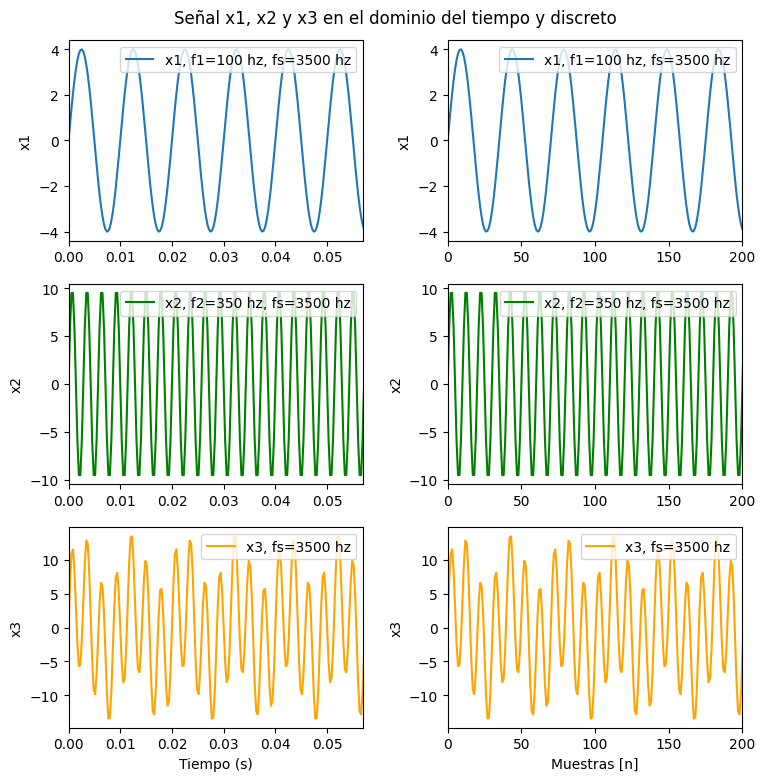

In [2]:
f1=100
f2=350

Fs=10*f2
Ts=1/Fs
n=np.arange(0,1000)
t=n*Ts

x1=4*np.sin(2*np.pi*f1*t)
x2=10*np.sin(2*np.pi*f2*t)

x3 = x1+x2

#Graficacion
fig, ax=plt.subplots(3,2,figsize=(8,8))
plt.tight_layout(pad=3, w_pad=3, h_pad=1.0)
fig.suptitle("Señal x1, x2 y x3 en el dominio del tiempo y discreto")
ax[0,0].plot(t,x1, label=f"x1, f1={f1} hz, fs={Fs} hz")
ax[0,0].set_ylabel("x1")
ax[0,0].set_xlim(0,0.057)
ax[0,0].legend(loc="upper right")
ax[1,0].plot(t,x2, color="green", label=f"x2, f2={f2} hz, fs={Fs} hz")
ax[1,0].set_ylabel("x2")
ax[1,0].set_xlim(0,0.057)
ax[1,0].legend(loc="upper right")
ax[2,0].plot(t,x3, color="orange", label=f"x3, fs={Fs} hz")
ax[2,0].set_ylabel("x3")
ax[2,0].set_xlim(0,0.057)
ax[2,0].set_xlabel("Tiempo (s)")
ax[2,0].legend(loc="upper right")

ax[0,1].plot(n,x1, label=f"x1, f1={f1} hz, fs={Fs} hz")
ax[0,1].set_ylabel("x1")
ax[0,1].set_xlim(0,200)
ax[0,1].legend(loc="upper right")
ax[1,1].plot(n,x2, color="green", label=f"x2, f2={f2} hz, fs={Fs} hz")
ax[1,1].set_ylabel("x2")
ax[1,1].set_xlim(0,200)
ax[1,1].legend(loc="upper right")
ax[2,1].plot(n,x3, color="orange", label=f"x3, fs={Fs} hz")
ax[2,1].set_ylabel("x3")
ax[2,1].set_xlim(0,200)
ax[2,1].set_xlabel("Muestras [n]")
ax[2,1].legend(loc="upper right")
plt.show()

## Dominio de la frecuencia de la señales

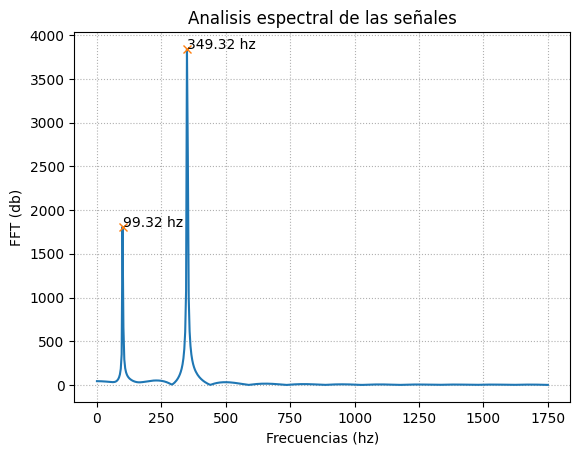

In [3]:
N=2**10 # 10 bits

X3 = np.fft.fft(x3,N)
X3 = X3[0:N//2]
X3m = np.abs(X3)
F = np.linspace(0,Fs/2,N//2)

plt.plot(F, X3m)
plt.grid(linestyle=":")
plt.title("Analisis espectral de las señales")
plt.xlabel("Frecuencias (hz)")
plt.ylabel("FFT (db)")

peaks, properties = signal.find_peaks(X3m, height=100)
plt.plot(F[peaks],properties["peak_heights"],"x")
plt.text(F[peaks][0],properties["peak_heights"][0], f"{np.round(F[peaks][0],2)} hz")
plt.text(F[peaks][1],properties["peak_heights"][1], f"{np.round(F[peaks][1],2)} hz")

plt.show()

## Diseño del filtro pasa bajo 

In [4]:
wp=2*np.pi*150
ws=2*np.pi*250

N_ord, Wc= signal.buttord(wp, ws, gpass=3, gstop=40, analog=True) #gpass=loss in passband edge frecuencies, gstop= attenuation in stopband edge frecuencies 
fc = np.round(Wc/(2*np.pi) ,2) 

print(f"Orden del filtro: {N_ord}")
print(f"Frecuencia de corte calculada: {fc} hz")


Orden del filtro: 10
Frecuencia de corte calculada: 150.04 hz


In [5]:
# s = sympy.Symbol('s')
# np.set_printoptions(precision=2)

# G = sy.Poly(b, s) / sy.Poly(np.around(a,3), s)
# G

In [6]:
# Funcion de transferencia del filtro pasa bajo analogico
b,a = signal.butter(N_ord, Wc, 'lowpass', True, 'ba')

#np.set_printoptions(precision=3)
b,a

(array([5.54296957e+29]),
 array([1.00000000e+00, 6.02617595e+03, 1.81573983e+07, 3.58581129e+10,
        5.12417412e+13, 5.52676210e+16, 4.55378348e+19, 2.83194248e+22,
        1.27438050e+25, 3.75868390e+27, 5.54296957e+29]))

Text(0, 0.5, 'Magnitud (db)')

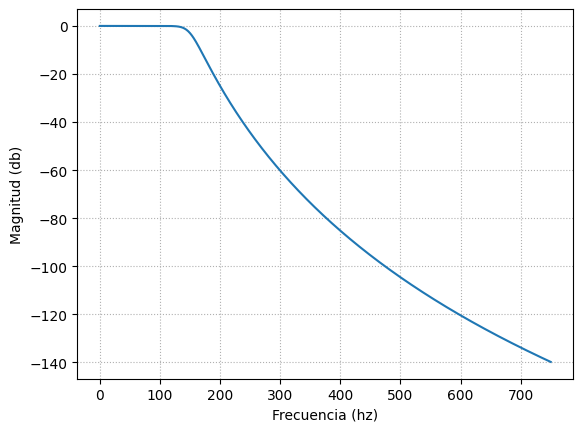

In [7]:
# Respuesta en frecuencia del filtro analogico
Fmax=750
F_freqs = np.linspace(0,Fmax,1000)
W_freqs = 2*np.pi*F_freqs  #Angular frecuences

W_freqs, H = signal.freqs(b,a,W_freqs)
Hm=np.abs(H)
plt.plot(F_freqs, 20 * np.log10(Hm))
plt.grid(linestyle=":")
plt.xlabel("Frecuencia (hz)")
plt.ylabel("Magnitud (db)")

## TRansformada bilineal de H(s) a H(z)

Text(0, 0.5, 'Magnitud (db)')

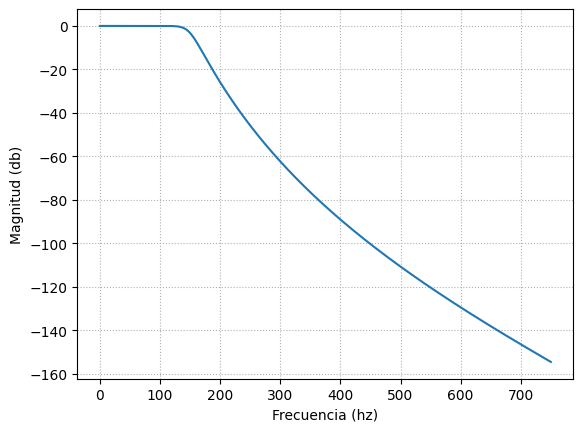

In [8]:
bd, ad = signal.bilinear(b,a,Fs)

Wz, Hd = signal.freqz(bd, ad, W_freqs/Fs)

Hdm = np.abs(Hd)
plt.plot(F_freqs, 20 * np.log10(Hdm))
plt.grid(linestyle=":")
plt.xlabel("Frecuencia (hz)")
plt.ylabel("Magnitud (db)")

## Filtrado

Text(0.5, 0, 'tiempo (s)')

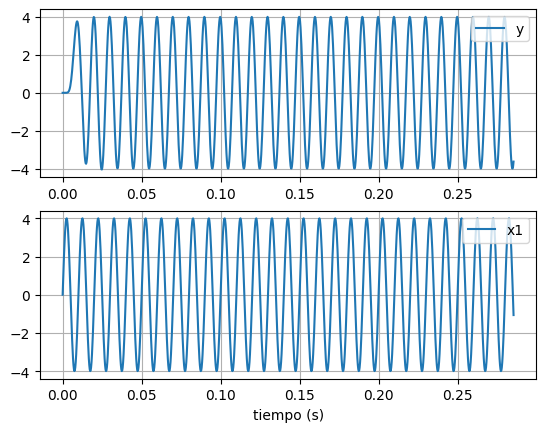

In [9]:
y = signal.lfilter(bd,ad, x3)

fig, ax = plt.subplots(2,1)
ax[0].plot(t,y, label="y")
ax[0].legend(loc="upper right")
ax[0].grid()
ax[1].plot(t,x1, label="x1")
ax[1].legend(loc="upper right")
ax[1].grid()
ax[1].set_xlabel("tiempo (s)")

Text([99.21798631], [1773.42580331], '99.0 hz')

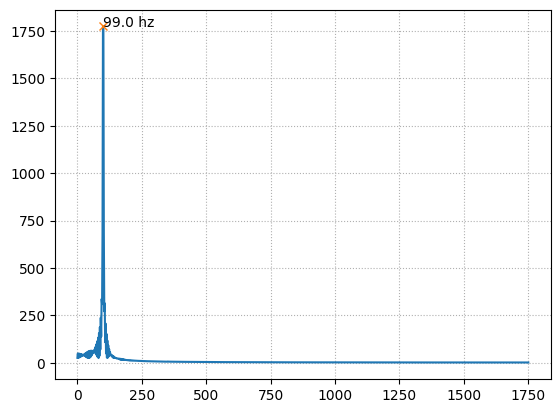

In [10]:
N=2048

Yf = np.fft.fft(y,N)
Yf = Yf[:N//2]
Ym = np.abs(Yf)

Fd = np.linspace(0, Fs//2, N//2)
plt.plot(Fd, Ym)
plt.grid(linestyle=":")

peaks, properties = signal.find_peaks(Ym, height=500)
plt.plot(Fd[peaks], properties['peak_heights'], "x")
plt.text(Fd[peaks], properties['peak_heights'], f"{np.round(Fd[peaks][0])} hz")

## Test Tf 2 SoS

In [11]:
bd, ad

(array([8.31111169e-10, 8.31111169e-09, 3.74000026e-08, 9.97333402e-08,
        1.74533345e-07, 2.09440015e-07, 1.74533345e-07, 9.97333402e-08,
        3.74000026e-08, 8.31111169e-09, 8.31111169e-10]),
 array([   1.        ,   -8.28887191,   31.04279749,  -69.15733541,
         101.47293922, -102.44471427,   72.05717753,  -34.86201333,
          11.10147231,   -2.10083904,    0.17938827]))

In [12]:
#sos1 = signal.tf2sos(bd,ad)
#sos1.shape

In [13]:
[1]+[0]

[1, 0]

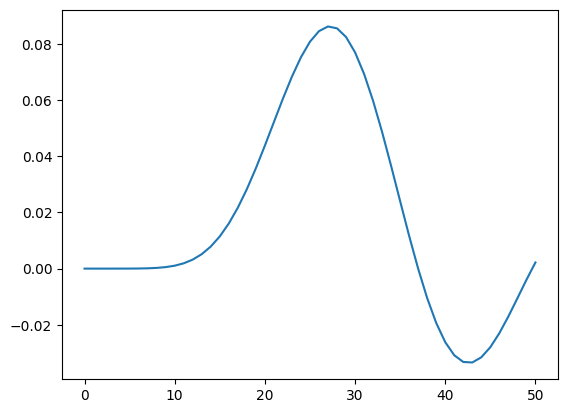

In [14]:
sos2 = signal.lfilter(bd,ad, [1]+[0]*50)
#print(sos2)
plt.plot(sos2)

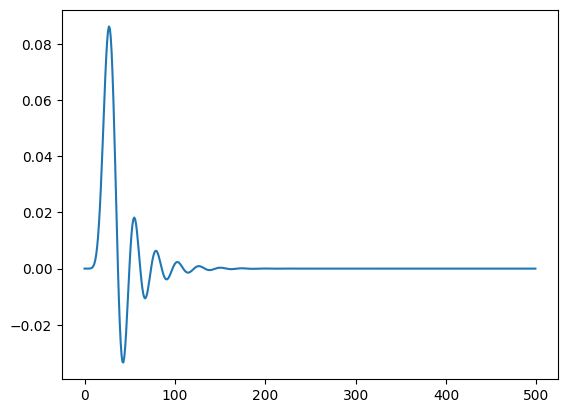

In [15]:
tt, yy = signal.dimpulse((bd,ad,Fs), n=500)
plt.plot(np.squeeze(yy))

(0.0, 0.1)

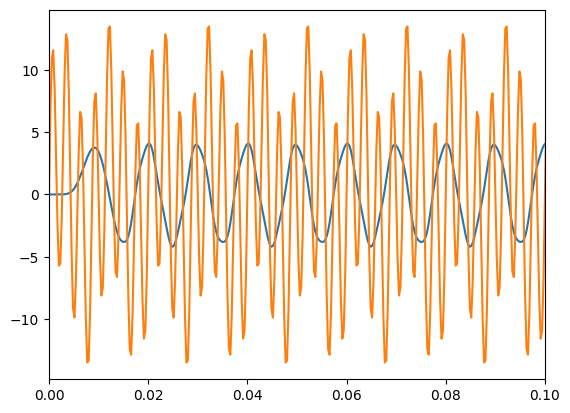

In [16]:
y3 = signal.lfilter(sos2,[1], x3)
#print(sos2)
plt.plot(t,y3)
plt.plot(t,x3)
plt.xlim(0,0.1)

Text([99.21798631], [1774.84085137], '99.0 hz')

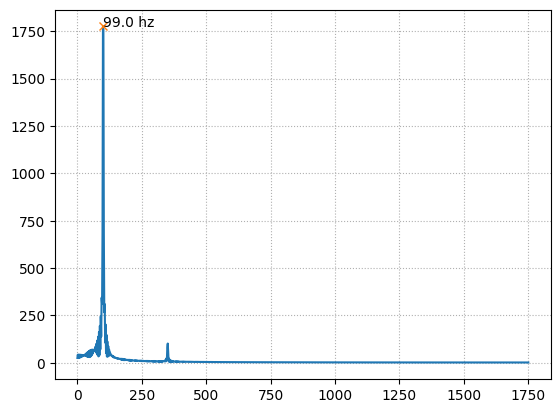

In [17]:
N=2048

Yf = np.fft.fft(y3,N)
Yf = Yf[:N//2]
Ym = np.abs(Yf)

Fd = np.linspace(0, Fs//2, N//2)
plt.plot(Fd, Ym)
plt.grid(linestyle=":")

peaks, properties = signal.find_peaks(Ym, height=500)
plt.plot(Fd[peaks], properties['peak_heights'], "x")
plt.text(Fd[peaks], properties['peak_heights'], f"{np.round(Fd[peaks][0])} hz")